In [13]:
#Autor: Alma
import pandas as pd
from datetime import datetime
import time

pd.set_option("expand_frame_repr", False)
df_gfi = pd.read_csv('gfi_coll.csv',usecols=['created_at','repository_url'])
df_other_iss= pd.read_csv('otheri_coll.csv',usecols=['created_at','repository_url'])
df_all_iss= pd.read_csv('all_issues_fin.csv',usecols=['created_at','repository_url'])
df_gfi['created_at'] = pd.to_datetime(df_gfi['created_at'])
df_other_iss['created_at'] = pd.to_datetime(df_other_iss['created_at'])
df_all_iss['created_at'] = pd.to_datetime(df_all_iss['created_at'])
# print(df_all_iss.sort_values(by=['created_at']).head(20))

In [2]:
print(df_gfi.shape)
print(first_issues_count['total'].min())


(9946, 2)
1


In [30]:
first_issues_count = df_gfi.groupby('repository_url').agg(total_first = pd.NamedAgg('repository_url',aggfunc='count'))
# first_issues_count['repository_url']= first_issues_count.index
# print(first_issues_count)
first_issues_count = first_issues_count.reset_index()
# print(first_issues_count)


all_issues_count = df_all_iss.groupby('repository_url').agg(total_all = pd.NamedAgg('repository_url',aggfunc='count'))
all_issues_count = all_issues_count.reset_index()
# print(all_issues_count)


all_first_count = pd.merge(left=all_issues_count,right=first_issues_count, how="inner",left_on='repository_url',right_on='repository_url')
# print(all_first_count)

all_first_count['ratio'] = all_first_count["total_first"].div(all_first_count["total_all"])
print(all_first_count)

                                        repository_url  total_all  total_first     ratio
0      https://api.github.com/repos/0xAX/linux-insides         41            8  0.195122
1    https://api.github.com/repos/ActivityWatch/act...         90            7  0.077778
2         https://api.github.com/repos/Aircoookie/WLED        389            5  0.012853
3          https://api.github.com/repos/Angel-ML/angel         90            1  0.011111
4    https://api.github.com/repos/AnthonyCalandra/m...          6            2  0.333333
..                                                 ...        ...          ...       ...
458   https://api.github.com/repos/ytdl-org/youtube-dl       4031            6  0.001488
459       https://api.github.com/repos/zaproxy/zaproxy        698           16  0.022923
460    https://api.github.com/repos/zephir-lang/zephir         89            1  0.011236
461      https://api.github.com/repos/zloirock/core-js         20            8  0.400000
462           https:/

KeyError: 'total'

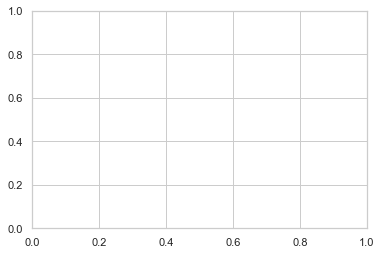

In [31]:
import seaborn
import matplotlib.pyplot as plt    
pos = [1, 2, 4, 5, 7, 8]    
seaborn.set(style = 'whitegrid') 
import numpy as np
# tip = seaborn.load_dataset('tips')
  
# seaborn.violinplot(df_gfi['repository_url'],points=20)

# fs = 10  # fontsize
# pos = [1, 2, 4, 5, 7, 8]
# data = [np.random.normal(0, std, size=100) for std in pos]

# fig, axs = plt.subplots(figsize=(10, 6))

# axs[0, 0].violinplot(df_gfi['repository_url'], pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)

fig, ax = plt.subplots()

# Create a plot
ax.violinplot([first_issues_count['total_first']])

# Add title
ax.set_title('Violin Plot')
plt.show()



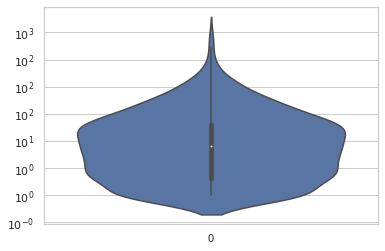

In [11]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import seaborn as sns
import numpy as np

# data = [[1e-05, 0.00102, 0.00498, 0.09154, 0.02009, 1e-05, 0.06649, 0.42253, 0.02062, 0.10812, 0.07128, 0.03903, 0.00506, 0.13391, 0.08668, 0.04127, 0.00927, 0.00118, 0.063, 0.18392, 0.05948, 0.07774, 0.14018, 0.0133, 0.00339, 0.00271, 0.05233, 0.00054, 0.0593, 1e-05, 0.00076, 0.03409, 0.71491, 0.02311, 0.10246, 0.12491, 0.05164, 0.1553, 0.01079, 0.01734, 0.02239, 0.1347, 0.02877, 0.04752, 0.00333, 0.04553, 0.03189, 0.00947, 0.00158, 0.00888, 0.12663, 0.07531, 0.12367, 0.11346, 0.06638, 0.06154, 1e-05, 0.1838, 0.08659, 0.05654, 0.07658, 0.0348, 0.02954, 0.0123, 0.01529, 0.05559, 0.00416, 0.00038, 0.14142, 0.00164, 0.03671, 0.10609, 0.01209, 0.0024, 0.11718, 0.11224, 0.06032, 0.09632, 0.12216, 0.00087, 0.06746, 0.00433, 0.06836, 0.09928, 2e-05, 0.14116, 0.05718, 0.01196, 0.04297, 0.00709, 0.10535, 0.04772, 0.05691, 0.06277, 1e-05, 0.03917, 0.0026, 0.06763, 0.02083, 0.32244, 0.00561, 0.03399, 0.08146, 0.10606, 0.01482, 0.00339, 0.02275, 0.00685, 0.1536, 0.0592, 0.08869, 1e-05, 0.20489, 0.00094, 0.00714, 0.06355, 0.03414, 0.03002, 0.02365, 0.04376, 0.0246, 0.02745, 0.07604, 0.12069, 1e-05, 0.02974, 0.10681, 0.00987, 0.02543, 0.01416, 0.00098, 3e-05, 0.00967, 0.11958, 0.02882, 0.03634, 0.19232, 0.12058, 0.36535, 0.07428, 0.02829, 0.09189, 0.03677, 0.00036, 0.0463, 0.57029, 0.0105, 0.00015, 0.06212, 0.0329, 0.06102, 0.12267],
# [0.01219, 0.14638, 0.03822, 0.05784, 0.03615, 0.03288, 0.00986, 0.05331, 0.01434, 0.00999, 0.05272, 0.03269, 0.0682, 0.15455, 0.09675, 0.02272, 0.0027, 0.01955, 0.06194, 0.00115, 0.07799, 0.03987, 0.11152, 0.07229, 0.007, 0.00075, 0.04499, 0.01534, 0.04301, 0.01247, 0.09511, 0.02297, 0.05538, 0.04614, 0.07359, 0.06909, 1e-05, 0.04247, 0.05485, 0.00071, 0.082, 0.07614, 0.03751, 0.01625, 0.03309, 0.03228, 0.08109, 0.02171, 0.07246, 0.00353, 0.02434, 0.01394, 0.037, 0.02429, 0.15162, 0.0527, 0.0201, 0.07954, 0.07626, 0.09285, 0.05071, 0.01224, 0.06331, 0.07556, 0.04952, 0.00052, 0.00588, 0.132, 0.00067, 0.00012, 0.00084, 0.03865, 0.02362, 0.08976, 0.18545, 0.04882, 0.03789, 0.05006, 0.02979, 0.003, 0.09262, 0.05668, 0.02486, 0.05855, 0.11588, 0.07713, 0.10428, 0.00706, 0.02467, 0.13257, 0.11547, 0.06143, 0.09478, 0.06099, 0.02483, 0.09312, 0.16867, 0.07236, 0.10962, 0.04149, 0.05005, 0.09087, 0.0313, 0.03697, 0.07201, 2e-05, 0.00259, 0.00115, 0.03907, 0.02931, 0.14907, 0.05598, 0.07087, 0.09709, 0.10653, 0.11936, 0.08196, 0.1213, 0.00627, 0.08496, 0.00038, 0.03537, 0.20043, 0.05159, 0.05872, 0.07754, 0.07621, 0.05924, 0.09587, 0.02653, 0.07135, 1e-05, 0.01377, 0.0062, 0.01965, 0.00115, 0.07529, 0.04709, 0.05458, 0.10895, 0.02195, 0.04534, 0.015, 0.00577, 0.05784, 0.01691, 0.08103, 0.04178, 0.04328, 0.01204, 0.03463, 0.03805, 0.01231, 0.03646, 0.01162, 0.16536, 0.03471, 0.00541, 0.09088, 0.06447, 0.07263, 0.05924, 0.0952, 0.09938, 0.04464, 0.05543, 0.03827, 0.11514, 0.02803, 0.09589, 0.0254, 0.05351, 0.00171, 0.00856, 0.05828, 0.11975, 7e-05, 0.07093, 0.06077, 0.0384, 0.00163, 0.05992, 0.00463, 0.00975, 0.00429, 0.12965, 0.03388, 0.02372, 0.07622, 0.04341, 0.06637, 0.00578, 0.06946, 0.00469, 0.11668, 0.07033, 0.06806, 0.05505, 0.02195, 0.05089, 0.03404, 0.00552, 0.05331, 0.03695, 0.41581, 0.01553, 0.02045, 0.09779, 0.03842, 0.01115, 0.05392, 0.01147, 0.05855, 0.05588, 0.20745, 0.01536, 0.03993, 0.07677, 0.01388, 0.0029, 0.00235, 0.05823, 0.05237, 0.00425, 0.09225, 0.00703, 0.24038, 0.06733, 0.00064, 0.08959, 0.04365, 0.02308, 0.04566, 0.08395, 0.0038, 0.05322, 0.0145, 0.02012, 0.07084, 0.08202, 0.01091, 0.03738, 0.03798, 0.03473, 0.08534, 0.00133, 0.04046, 0.10119, 0.0317, 0.00312, 0.03614, 0.10442, 0.13286, 0.0042, 0.04229, 0.01735, 0.09879, 0.07516, 0.00303, 0.08062, 0.09347, 0.03473, 0.05099, 0.16373, 0.08988, 0.04696, 0.07488, 0.12159, 0.11098, 0.00549, 0.00122, 0.05276, 0.09883, 0.01346, 0.02059, 0.07394, 0.0413, 0.08766, 0.0124, 0.09913, 0.00754, 0.15671, 0.02699, 0.09978, 1e-05, 0.00243, 0.02819, 0.00027, 0.05793, 0.03165, 0.10168, 0.00042, 0.00044, 0.01332, 0.00542, 0.05946, 0.009, 0.10857, 0.01699, 1e-05, 0.00073, 0.10842, 0.17143, 0.00036, 0.00014, 0.10508, 0.01333, 0.34202, 0.12201, 0.04618, 0.02507, 0.02939, 0.03497, 0.01905, 0.00136, 0.02354, 0.00061, 0.08514, 0.14529, 0.04097, 0.12821, 0.18862],
# [0.04683, 0.02943, 0.07885, 0.07846, 0.06855, 0.02815, 0.00792, 0.0826, 0.00554, 0.01041, 0.03957, 0.0126, 0.08399, 0.15046, 0.15594, 0.03941, 0.0428, 0.11343, 0.15665, 0.07381, 0.04386, 0.12008, 0.04816, 0.04844, 0.08248, 0.08023, 0.03011, 0.00464, 0.07204, 0.08376, 0.05777, 0.06164, 0.00697, 0.02023, 0.04844, 0.0592, 0.00954, 0.06357, 0.0122, 0.05905, 0.00705, 0.0054, 0.08822, 0.06056, 0.02598, 0.02136, 0.05638, 0.03768, 0.05101, 0.08908, 0.0384, 0.01579, 0.04023, 0.03746, 0.17236, 0.08293, 0.12469, 0.14018, 0.04301, 0.07258, 0.02678, 0.08078, 0.07698, 0.06346, 0.06984, 0.04832, 0.07512, 0.0342, 0.05339, 0.026, 0.11585, 0.02744, 0.00979, 0.01312, 0.05915, 0.01326, 0.00107, 0.00737, 0.05971, 0.0451, 0.05788, 0.0007, 0.0043, 0.00142, 0.0019, 0.00055, 0.00223, 0.02441, 0.04555, 0.03869, 0.05791, 0.05517, 0.15743, 0.04517, 0.47114, 0.05639, 0.00152, 0.00371, 1e-05, 1e-05, 0.04192, 0.02758, 0.01945, 0.02763, 0.04021, 0.02844, 0.01823, 0.10665, 0.02067, 0.05433, 0.05591, 0.00733, 0.00858, 0.01949, 0.06519, 0.07793, 0.00199, 0.09916, 0.08717, 0.06273, 0.09408, 0.00638, 0.00248, 0.08922, 0.09157, 0.03525, 0.01791, 0.06016, 0.01939, 0.12194, 0.08303, 0.0831, 0.02714, 0.06312, 0.11584, 0.11334, 0.04314, 0.02575, 0.00629, 0.02408, 0.02274, 0.03037, 0.06737, 0.0175, 0.00888, 0.06568, 0.0839, 0.0085, 0.00831, 0.00154, 0.01072, 0.01289, 0.09074, 0.02131, 0.02997, 0.02343, 0.02355, 0.05324, 0.09564, 0.17995, 0.00828, 0.0148, 0.01858, 0.02106, 0.00288, 0.00344, 0.001, 0.02143, 0.00732, 0.01458, 0.01547, 0.01742, 0.00032, 0.24005, 0.00028, 0.00302, 0.07275, 0.04579, 0.06316, 0.02572, 0.09316, 0.03062, 0.10521, 0.07123, 0.03069, 0.07958, 0.04484, 0.01948, 0.01951, 0.01282, 0.00868, 0.07931, 0.01105, 0.01235, 0.09297, 0.06959, 0.00716, 0.0271, 0.00592, 0.09362, 0.00319, 0.00859, 0.08486, 0.02001, 0.00194, 0.04189, 0.09024, 0.07705, 0.07365, 0.01123, 0.03202, 0.01361, 0.00098, 0.00397, 0.00139, 0.00397, 0.00445, 1e-05, 0.00267, 0.06564, 0.06567, 0.06566, 0.06566, 0.09249, 0.03475, 0.0338, 0.0664, 0.02986, 0.04024, 0.00835, 0.04304, 0.04081, 0.04534, 0.06636, 0.03312, 0.06175, 0.03117, 0.02243, 0.03454, 0.11135, 0.07016, 0.0681, 0.09716, 0.02589, 0.4367, 0.08293, 0.11834, 0.00191, 0.10913, 0.00159, 0.0638, 0.01808, 0.00116, 0.00911, 0.01408, 0.09179, 0.02122, 0.05026, 0.05144, 0.03169, 0.06674]]

log_data = [[np.log10(d) for d in row] for row in [first_issues_count['total_first']]]

fig, ax = plt.subplots()
sns.violinplot(data=log_data, ax=ax)
# sns.swarmplot(data=log_data, ax=ax[1])
# sns.stripplot(data=log_data, ax=ax[2])
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(1,3) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
plt.show()

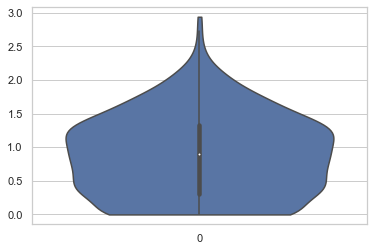

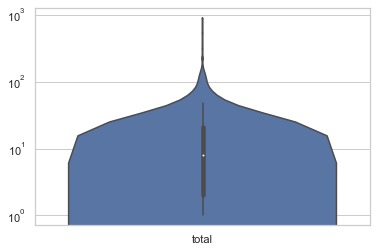

In [12]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import seaborn as sns
import numpy as np
# from statannot import add_stat_annotation
# first_issues_count['total'] = first_issues_count['total']+1
log_data = [[np.log10(d) for d in row] for row in [first_issues_count['total']]]
# print(repr(first_issues_count['total'].to_numpy()))
# print('Array:\n', log_data)
file = open("file1.txt", "w+")
 
# Saving the array in a text file
content = str(repr(first_issues_count['total'].to_numpy()))
file.write(content)
file.close()

fig, ax = plt.subplots()
# xs = np.logspace(-1,10,10)
# ax.set_yscale('log')
sns.violinplot(data=log_data, ax=ax, spanmode = 'hard',cut=0)
# sns.swarmplot(data=log_data, ax=ax[1])
# sns.stripplot(data=log_data, ax=ax[2])
# ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

# ax.yaxis.set_ticks([np.log10(x) for p in range(1,3) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
# ax.set_yscale('log')
# test_results = add_stat_annotation(ax, data=first_issues_count,  
#                                    box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
#                                    test='Mann-Whitney', text_format='star', loc='inside',
#                                    line_offset_to_box=0.15,
#                                    verbose=2)
plt.show()

fig, ax = plt.subplots()
# xs = np.logspace(-10,10,10)
ax.set_yscale('log')

g = sns.violinplot(data=first_issues_count, ax=ax, spanmode = 'hard')

# ax = g.ax_joint
# ax.set_xscale('log')
# ax.set_yscale('log')

# g.ax_marg_x.set_xscale('log')
# g.ax_marg_y.set_yscale('log')
# plt.margins(x=2)
plt.show()

# mybins=np.logspace(0, np.log(100), 100)

# g = sns.violinplot(data=log_data, ax=ax, spanmode = 'hard')
# g.plot_marginals(sns.distplot, color='blue', bins=mybins)
# g = g.plot(sns.regplot, sns.distplot)
# g = g.annotate(stats.pearsonr)


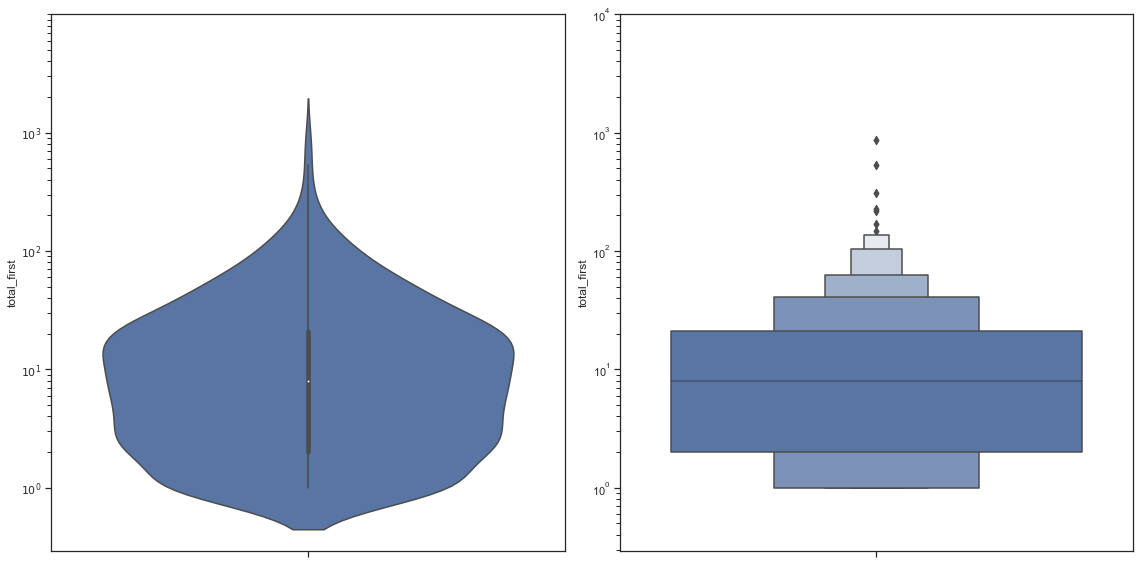

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np

sns.set_style('ticks')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

sns.violinplot(y=np.log10(first_issues_count['total_first']), ax=ax1)
major_ticks = np.arange(np.floor(np.log10(first_issues_count['total_first']).min()), np.log10(first_issues_count['total_first']).max() + 1)
ax1.yaxis.set_ticks(major_ticks, minor=False)
ax1.yaxis.set_ticks([np.log10(x) for p in major_ticks for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
ax1.yaxis.set_major_formatter(StrMethodFormatter("$10^{{{x:.0f}}}$"))

ax2.set_yscale('log')
sns.boxenplot(y=first_issues_count['total_first'], ax=ax2)
ymin, ymax = ax1.get_ylim()
ax2.set_ylim(10**ymin, 10**ymax)

plt.tight_layout()
plt.show()

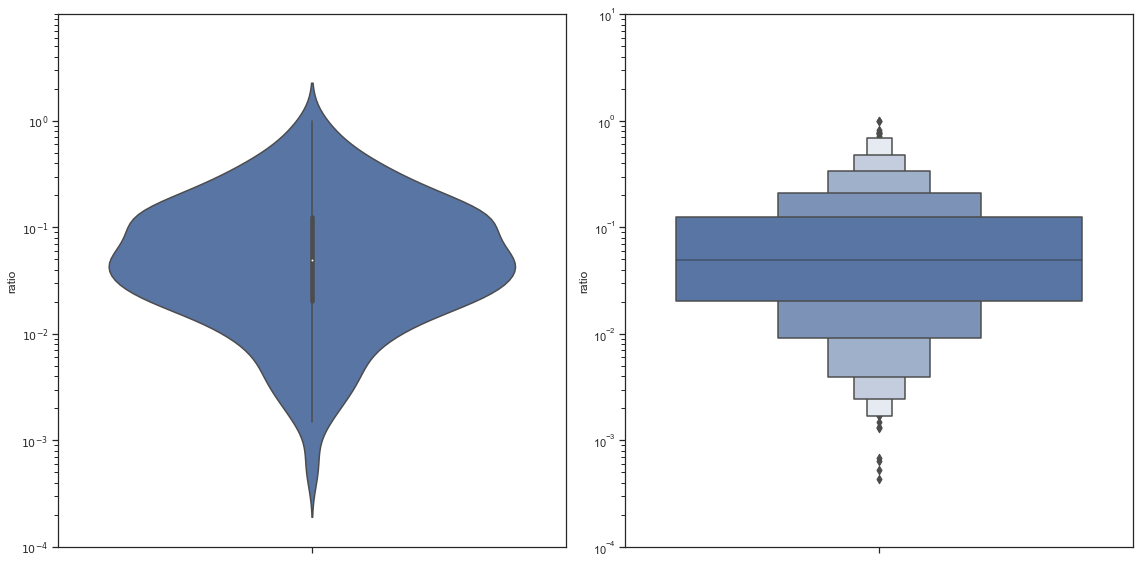

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np

sns.set_style('ticks')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

sns.violinplot(y=np.log10(all_first_count['ratio']), ax=ax1)
major_ticks = np.arange(np.floor(np.log10(all_first_count['ratio']).min()), np.log10(all_first_count['ratio']).max() + 1)
ax1.yaxis.set_ticks(major_ticks, minor=False)
ax1.yaxis.set_ticks([np.log10(x) for p in major_ticks for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
ax1.yaxis.set_major_formatter(StrMethodFormatter("$10^{{{x:.0f}}}$"))

ax2.set_yscale('log')
sns.boxenplot(y=all_first_count['ratio'], ax=ax2)
ymin, ymax = ax1.get_ylim()
ax2.set_ylim(10**ymin, 10**ymax)

plt.tight_layout()
plt.show()